In [1]:
### Importing libraries
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)

df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

sentiment
negative    25000
positive    25000
dtype: int64


<Axes: xlabel='sentiment'>

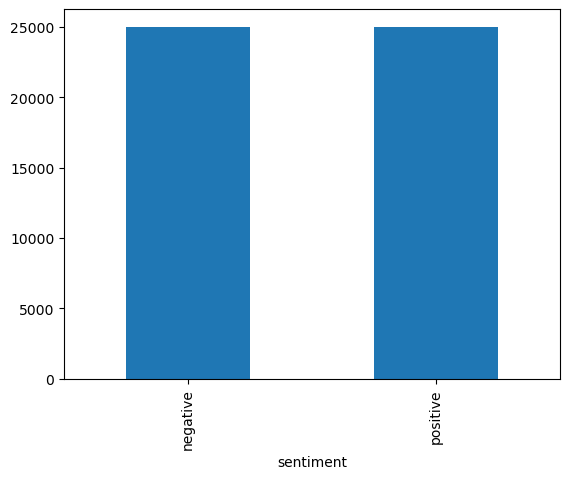

In [4]:
print(df.value_counts('sentiment'))
df.value_counts('sentiment').plot(kind='bar')

In [5]:
### Preprocessing Function
ps = PorterStemmer()
corpus = set()
def preprocess(text):
    
    ## removing unwanted space
    text = text.strip()
    
    ## removing html tags 
    text = re.sub("<[^>]*>", "",text)
    
    ## removing any numerical values
    text = re.sub('[^a-zA-Z]', ' ',text)
    
    ## lower case the word
    text = text.lower()
    
    text = text.split()
    
    ## stemming the word for sentiment analysis do not remove the stop word
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [6]:
df['Preprocessed_review'] = df.review.apply(preprocess)

In [7]:
map_dict = {'positive':1,
           'negative':0}
df['sentiment_numeric'] = df.sentiment.map(map_dict)
df.head()

,review,sentiment,Preprocessed_review,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,one of the other review ha mention that after ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonder littl product the film techniqu is ve...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought thi wa a wonder way to spend time on...,1
3,Basically there's a family where a little boy ...,negative,basic there s a famili where a littl boy jake ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,1


In [8]:
### performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Preprocessed_review	,
                                                 df.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=df.sentiment_numeric)

In [9]:
x_train.shape,x_test.shape

((40000,), (10000,))

In [10]:
multi_nb = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('Multi_NB', MultinomialNB())         
])

multi_nb.fit(x_train, y_train)


y_pred_mnb = multi_nb.predict(x_test)

print(f'multi naive bayes precision: {precision_score(y_test,y_pred_mnb)}')
print(f'multi naive bayes accuracy: {accuracy_score(y_test,y_pred_mnb)}')

multi naive bayes precision: 0.8742151527835914
multi naive bayes accuracy: 0.8576


Text(95.72222222222221, 0.5, 'Truth')

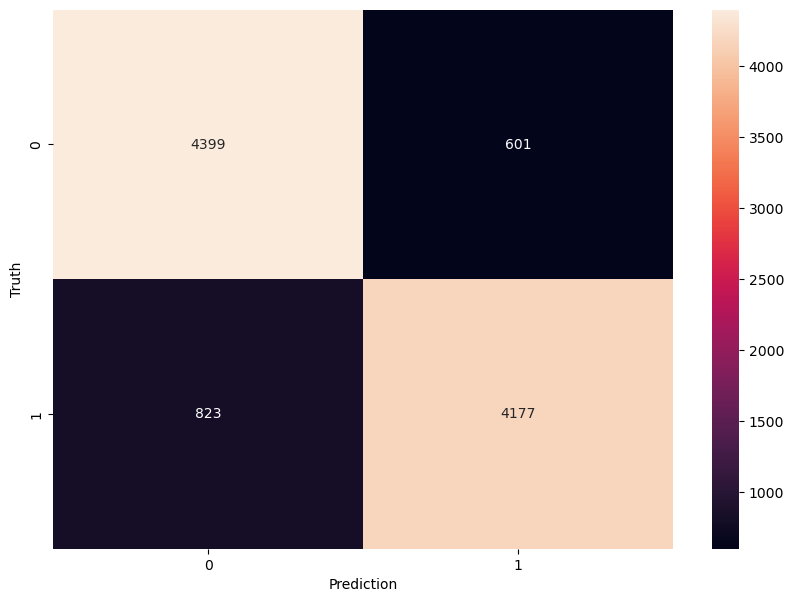

In [11]:
confusion_mat = confusion_matrix(y_test, y_pred_mnb)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [12]:
rfc = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('rf', RandomForestClassifier(random_state=42))         
])

rfc.fit(x_train, y_train)


y_pred_rfc = rfc.predict(x_test)

print(f'RandomForest Classifier precision: {precision_score(y_test,y_pred_rfc)}')
print(f'RandomForest Classifier accuracy: {accuracy_score(y_test,y_pred_rfc)}')

RandomForest Classifier precision: 0.8499696294796517
RandomForest Classifier accuracy: 0.8457


Text(95.72222222222221, 0.5, 'Truth')

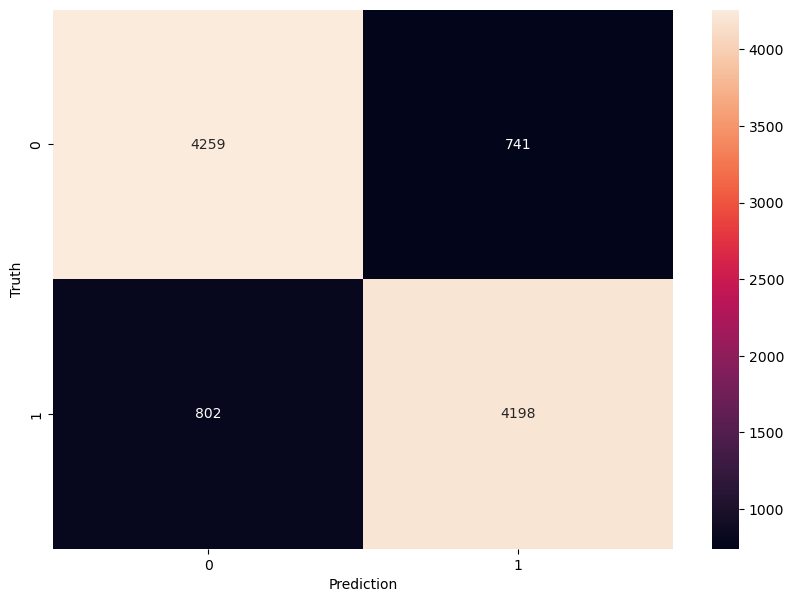

In [13]:
confusion_mat = confusion_matrix(y_test, y_pred_rfc)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [14]:
lr = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('log_reg', LogisticRegression())         
])

lr.fit(x_train, y_train)


y_pred_lr = lr.predict(x_test)

print(f'Logistic Regression precision: {precision_score(y_test,y_pred_lr)}')
print(f'Logistic Regression accuracy: {accuracy_score(y_test,y_pred_lr)}')

C:\Users\ARINDAM DAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression precision: 0.8903785488958991
Logistic Regression accuracy: 0.896


Text(95.72222222222221, 0.5, 'Truth')

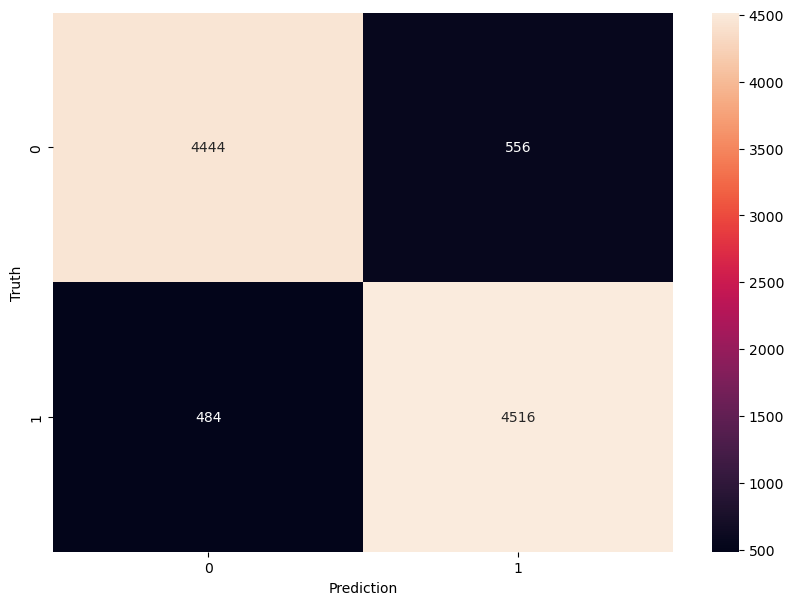

In [15]:
confusion_mat = confusion_matrix(y_test, y_pred_lr)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [16]:
report_df = pd.DataFrame({'model':['Random Forest', 'Multi Naive Bayes','Logistic Regression'],
                          'Precision': [precision_score(y_test,y_pred_rfc),precision_score(y_test,y_pred_mnb),precision_score(y_test,y_pred_lr)],
                          'Accuracy':[accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_mnb),accuracy_score(y_test,y_pred_lr)]})
report_df

,model,Precision,Accuracy
0,Random Forest,0.849970,0.8457
1,Multi Naive Bayes,0.874215,0.8576
2,Logistic Regression,0.890379,0.8960


**From this it is clear that Logistic Regression Classify the sentiment with good accuracy and precision.**